<a href="https://colab.research.google.com/github/Harisha-AlmaBetter/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/niharika/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<B>NETFLIX MOVIES AND TV SHOWS CLUSTERING

# <B>Problem Statement

**This** dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#<b> Import Packages

In [1]:
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

In [45]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

from collections import Counter


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

#<B>Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
nf=pd.read_csv('/content/drive/MyDrive/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


#<B>Checking Shape and Column Names

In [7]:
nf.shape

(7787, 12)

In [8]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<B>To make the column names more meaningful, "listed_in" has been changed to "genres".

In [9]:
nf.rename(columns = {"listed_in":"genres"},inplace = True)
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

<B>Validating Duplicate Records

In [10]:
#Drop duplicates if any
nf=nf.drop_duplicates()
nf.shape

(7787, 12)

<B>No duplicates found.

In [11]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 790.9+ KB


We can clearly see that there are few columns which have null values.

In [12]:
nf.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


#<B>Missing Data Anaysis

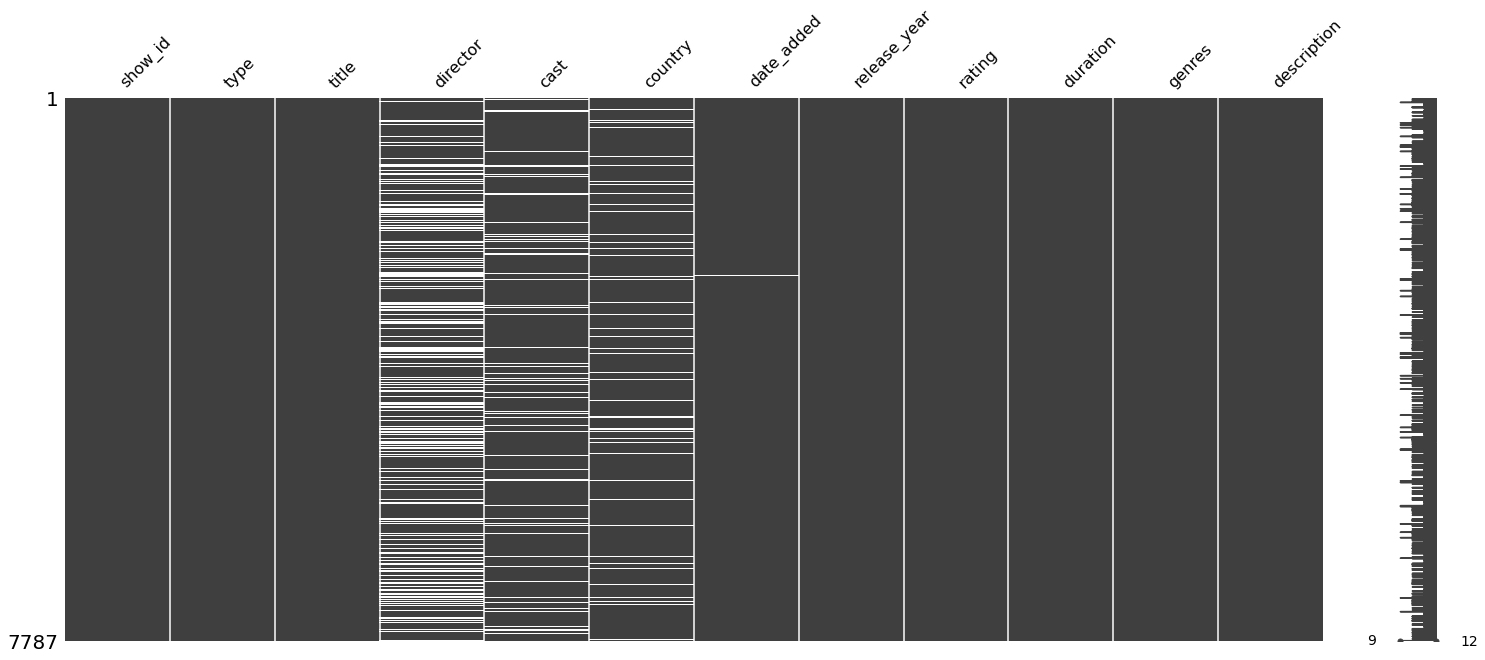

In [13]:
# Visualize missing values as a matrix
msno.matrix(nf)

Observation: Using this matrix we can quickly find the pattern of 'missingness' in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

In [14]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Observation:

The missing values are in:


*   "director": Very less information-not needed for the analysis so we will be dropping this.
 
*   "cast": there are too many diferent values so we will be dropping this.

*   "country": Important variable hence we need to fix this.

*   "date_added": there are just a few cases, so lets scrap them.

*   "rating": there are just a few cases, so lets try finding their replacements on the internet.

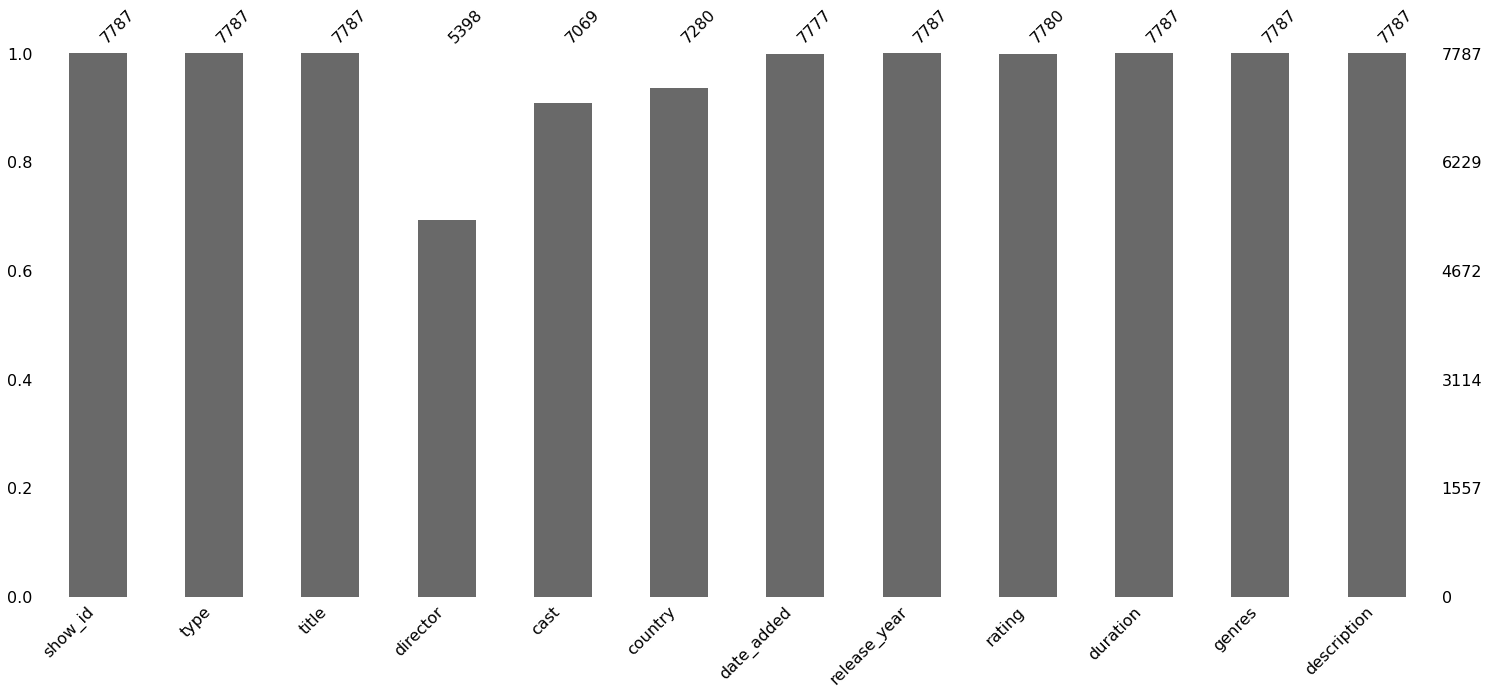

In [15]:
msno.bar(nf)

Observation: This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

In [16]:
for i in nf.columns:
  null_rate = nf[i].isnull().sum()/len(nf)*100
  if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 2)))

director's null rate: 30.68%
cast's null rate: 9.22%
country's null rate: 6.51%
date_added's null rate: 0.13%
rating's null rate: 0.09%


Observation: As per our earlier analysis, we can see that the 'director' column has the highest whereas 'rating' column has the lowest number of missing values!

In [17]:
nf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

Observation: All the show IDs and Titles are unique whereas others might have been repeated once or more times!

###<B>Handling Null Values

We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [18]:
nf.isnull().values.any()

True

In [19]:
nf.isnull().sum().sum()

3631

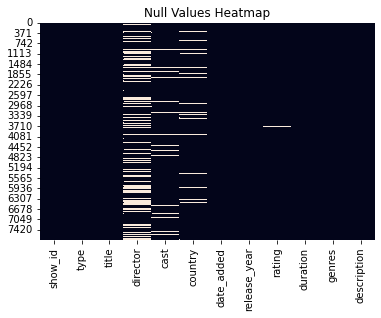

In [20]:
sns.heatmap(nf.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

Observation: Using this matrix we can quickly find the pattern of 'missingness' in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

In [21]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 3,631 null values across the entire dataset with 2,389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

In [22]:
nf['director'].fillna('No Director', inplace=True)
nf['cast'].fillna('No Cast', inplace=True)
nf['country'].fillna('Country Unavailable', inplace=True)
nf.dropna(subset=['date_added','rating'],inplace=True)

In [23]:
nf.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
genres          False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. 

Since 'director', 'cast', and 'country' contain the majority of null values, we will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset. After, we can see that there are no more null values in the dataset.

**Inference**


*   Netflix has 25% of movies and TV shows that were released in 2013

*   About 75% of Netflix's content consists of movies and TV shows released after 2013


*   Data from Netflix shows that new trend movies or TV shows are more prevalent.

*   For more subscribers, Netflix should invest in classic Movies and TV shows.






###<B>Splitting the Dataset

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [24]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [25]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


<B>Analyzing basic statistics about each feature, such as count, min, max, and mean.

In [26]:
nf.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Inference**


*   Netflix has 25% of movies and TV shows that were released in 2013

*   About 75% of Netflix's content consists of movies and TV shows released after 2013


*   Data from Netflix shows that new trend movies or TV shows are more prevalent.

*   For more subscribers, Netflix should invest in classic Movies and TV shows.






# **3. Data Preparation**

Date Added: First, the date is in the following format: 25 September, 2021. This is a text (string) which is not actionable. We need to take the text and turn it into a date format. The second thing we want to do is to seperate the year and place it in a different column which we will call "added_year". This will help me in next steps

Rating: It appears like there is nothing wrong with 'rating'. But, to the outside reader - ratings like 'TV-MA' or 'PG-13' means nothing. We just know that the rating means "for specific audiance". So, we want to conduct a research to understand all the ratings, and then change the text into a more readable, appropriate text

Listed In: simply put, 'genre'. However, we do notice something odd. Values like "International TV Show" or "International Movie" are not genres. These are types of content. So, let's split all the "International" to a different column, and remove them from "listed_in

In [27]:
#adding columns of month and year of addition
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month_name()
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


Processing the 'rating' column'. Here we have 2 phases, because not only we need to interpert what every rating means, we also need to change it to a more understandable text. Our course of action will be:

1. Listing all the unique ratings for movies and TV shows apart
2.Check for similarities / differences between TV and movie ratings
3. Interpert what every rating means
4. Decide on new rating categories and change accordingly

In [28]:
print('TV Shows Ratings:',nf[nf['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',nf[nf['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


We see here that although all TV shows have a rating that starts with 'TV-' that makes them unique, some of the movie titles also have a rating that starts with 'TV-'. So its a mix.

After research, we decided to categorize the different ratings based on CONTENT (and not AGE). From our understanding, there are 6 content categories in which we want to divide the ratings by:

*   Kids
*   All Ages
*   Teens
*   Brief Violence/Nude
*   Adult Content
*   Unrated

In [29]:
nf['rating'] = nf['rating'].replace({'TV-PG':'Brief Violence/Nude',
                                               'PG': 'Brief Violence/Nude', 
                                               'TV-G':'All Ages', 
                                               'G':'All Ages', 
                                               'TV-14':'Teens', 
                                               'PG-13':'Teens', 
                                               'TV-MA':'Adult Content',
                                               'R':'Adult Content',
                                               'NC-17':'Adult Content',
                                               'TV-Y':'Kids',
                                               'TV-Y7':'Kids',
                                               'TV-Y7-FV':'Kids',
                                               'NR':'Unrated',
                                               'UR':'Unrated'})

Now, let's deal with "International" types:

In [30]:
nf['international'] = nf['genres'].apply(lambda x: "International" in x) 

nf['genres'] = nf['genres'].apply(lambda x: x.split(", ")) 

nf[(nf['type'] == 'TV Show') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International TV Shows"))

nf[(nf['type'] == 'Movie') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International Movies"))

nf['genres'] = nf['genres'].apply(lambda x: ", ".join(x)) 

Next and final issue is to make sure to replace all NaN values with "Not Available" as we initially wanted

In [31]:
nf = nf.fillna("Not Available")

# **Handling Comma-Delimited Values**

First the is the need to make sure all comma-delimited values were placed in the correct order/form

In [32]:
comma_columns = ['cast','director','country','genres']

for column in comma_columns:
    if len(nf[nf[column].str.startswith(",")]) > 0:
        print("In column:",column,"there are bad entries that BEGIN with a comma")
    if len(nf[nf[column].str.endswith(",")]) > 0:
        print("In column:",column,"there are bad entries that END with a comma")
    if len(nf[nf[column] == '']) > 0:
        print("In column:",column,"there are bad entries that CONTAIN empty values ''")

In column: country there are bad entries that END with a comma
In column: genres there are bad entries that CONTAIN empty values ''


So there are bad entries that needs to be fixed. Let's fix it:

In [33]:
nf[nf['country'].str.endswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international
1402,s1403,Movie,City of Joy,Madeleine Gavin,No Cast,"United States,","September 7, 2018",2018,Adult Content,77 min,Documentaries,Women who've been sexually brutalized in war-t...,2018,September,False
2315,s2316,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,","July 18, 2020",2018,Teens,87 min,Dramas,Separated from their young son during the brut...,2020,July,True
2827,s2828,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,","October 1, 2019",1975,Adult Content,96 min,"Classic Movies, Dramas",A motivated teen strives to rise from dishwash...,2019,October,True
7433,s7434,Movie,Virunga,Orlando von Einsiedel,No Cast,"United Kingdom,","November 7, 2014",2014,Adult Content,100 min,Documentaries,The Oscar-nominated true story of the rangers ...,2014,November,True


In [34]:
#correcting entries
nf.loc[1402,'country'] = 'United States'
nf.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
nf.loc[2827,'country'] = 'Poland'
nf.loc[7433,'country'] = 'United Kingdom'

Having look at empty genres values

In [35]:
nf[nf['genres']=='']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international
1707,s1708,Movie,Derren Brown: Miracle,No Director,Derren Brown,United Kingdom,"June 22, 2018",2018,Adult Content,74 min,,Illusionist Derren Brown reinvents the concept...,2018,June,True
1729,s1730,TV Show,Devlok with Devdutt Pattanaik,No Director,"Rasika Dugal, Devdutt Pattanaik",India,"October 15, 2018",2017,Brief Violence/Nude,1 Season,,"Through chats with host Rasika Dugal, mytholog...",2018,October,True
2035,s2036,TV Show,Eurovision Song Contest,No Director,"Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub",Country Unavailable,"July 23, 2019",2019,Brief Violence/Nude,1 Season,,Singers from all over Europe represent their c...,2019,July,True
3494,s3495,Movie,La Gran Ilusión,Antonio Díaz,Antonio Díaz,Country Unavailable,"October 28, 2020",2016,Teens,50 min,,"Known as ""El Mago Pop,"" illusionist Antonio Dí...",2020,October,True
4341,s4342,Movie,My Next Guest with David Letterman and Shah Ru...,Michael Steed,"Shah Rukh Khan, David Letterman",Country Unavailable,"October 25, 2019",2019,Brief Violence/Nude,61 min,,"""King of Bollywood"" Shah Rukh Khan opens up ab...",2019,October,True


In [36]:
#filling up entries by getting idea from description
nf.loc[1707,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[1729,'genres'] = 'Stand-Up Comedy'
nf.loc[2035,'genres'] = 'Reality TV'
nf.loc[3494,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[4341,'genres'] = 'Stand-Up Comedy & Talk Shows'

In [37]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,2020,August,True
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,True
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,True
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,False


###<B>Splitting the Dataset

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [38]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.duration = nf_movies.duration.str.replace(' min','').astype(int)
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,True
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,True
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teens,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teens,123,Dramas,A brilliant group of students become card-coun...,2020,January,False
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,Adult Content,95,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,True


In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, we will convert the values in these columns into integers for both the movies and shows datasets.

In [39]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.rename(columns={'duration':'seasons'}, inplace=True)
nf_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
nf_shows.seasons = nf_shows.seasons.str.replace(' Seasons','').astype(int)
nf_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,genres,description,year_added,month_added,international
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4,"TV Dramas, TV Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,2020,August,True
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,Adult Content,1,"TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July,True
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,Adult Content,1,"Crime TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,November,True
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,Adult Content,1,"Crime TV Shows, Docuseries",Archival video and new interviews examine Mexi...,2019,May,True
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,Teens,1,TV Dramas,"As a psychology professor faces Alzheimer's, h...",2019,March,True


# **4. Exploratory Data Analysis and Visualization**

Analysis basic statistics of each feature

##**4.1 TV Shows or Movies**

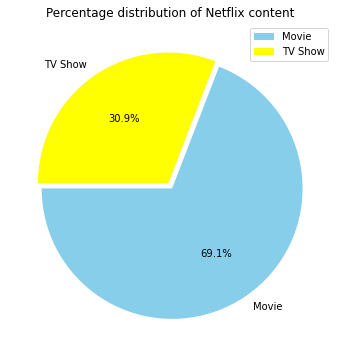

In [40]:
plt.figure(figsize=(12,6))
plt.title("Percentage distribution of Netflix content")
g = plt.pie(nf.type.value_counts(), explode=(0.025,0.025), labels=nf.type.value_counts().index, colors=['skyblue','yellow'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Inference:

*   Netflix has 70% of its content as movies
*   Movies are clearly more popular on Netflix than TV shows

Let's find out number of movies added to Netflix yearly.

##<B>4.2 Ratings on Netflix




Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [41]:
nf.rating

0             Adult Content
1             Adult Content
2             Adult Content
3                     Teens
4                     Teens
               ...         
7782          Adult Content
7783                  Teens
7784          Adult Content
7785    Brief Violence/Nude
7786          Adult Content
Name: rating, Length: 7770, dtype: object

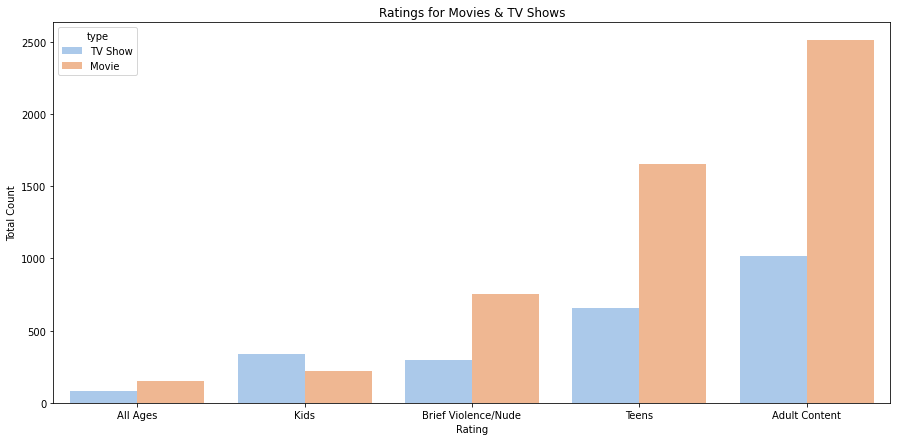

In [42]:
order = ['All Ages','Kids','Brief Violence/Nude','Teens','Adult Content']
plt.figure(figsize=(15,7))
g = sns.countplot(nf.rating, hue=nf.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

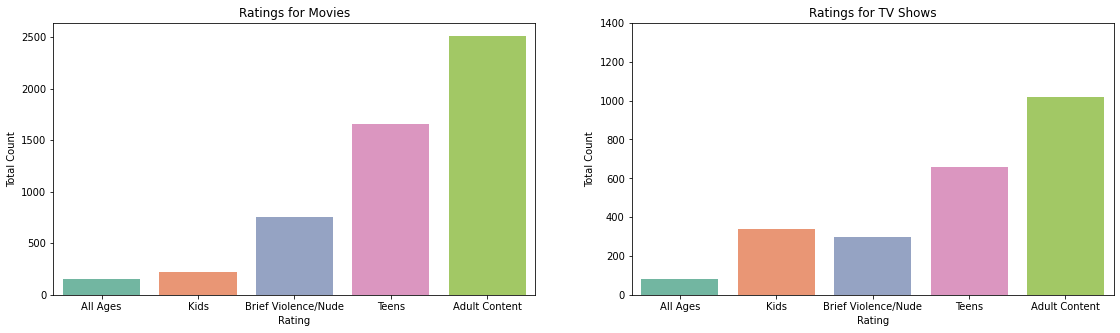

In [43]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(nf_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(nf_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [ ]:
plot_

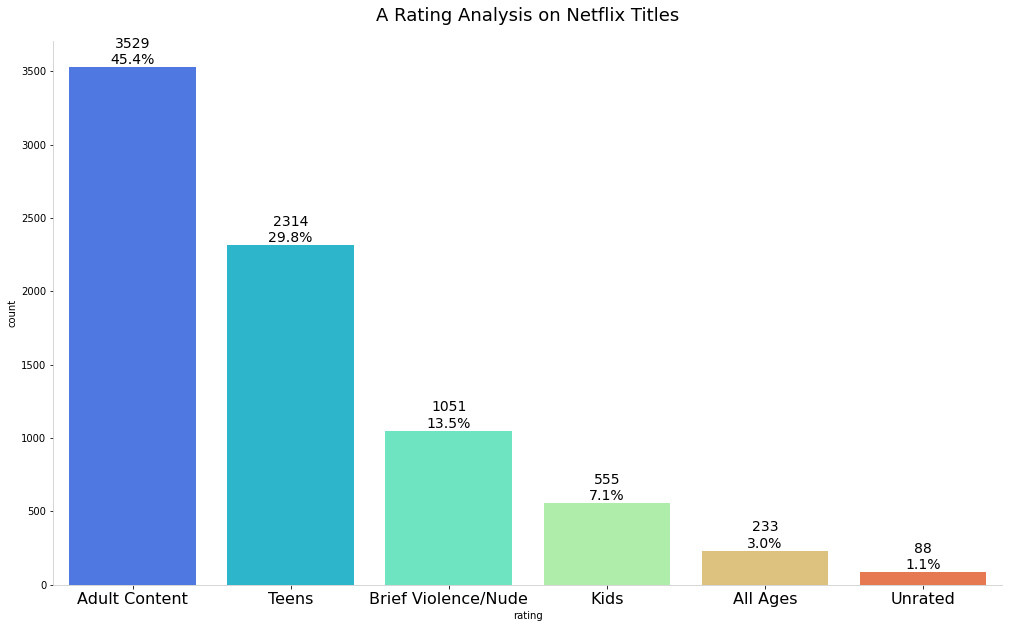

In [46]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', order=True, figsize=(17, 10),
               title='A Rating Analysis on Netflix Titles', size_title=18)
plt.xticks(fontsize=16)
plt.show()

<B>Let's break the count analysis by title type.

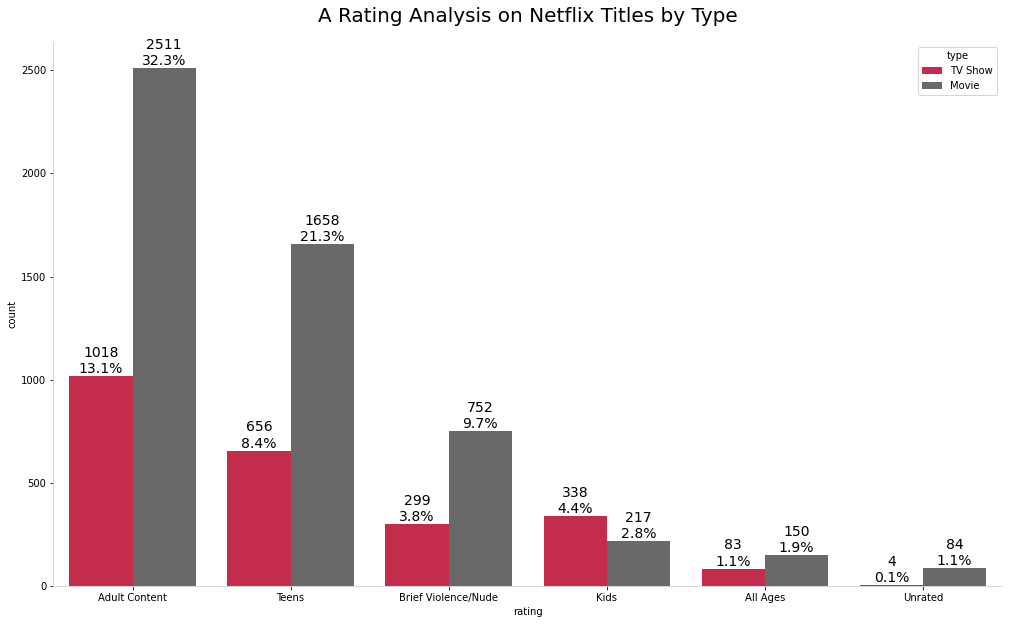

In [48]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', hue='type', order=True, figsize=(17, 10), palette=['crimson', 'dimgrey'],
               title='A Rating Analysis on Netflix Titles by Type', size_title=20)
plt.xticks(fontsize=10)
plt.show()

The above plot shows the top Movies and TV Shows based on rating system. Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

##<B>4.3 Content added each yearly, monthly


In [49]:
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf_movies['year_added'] = pd.DatetimeIndex(nf_movies['date_added']).year
nf_shows['year_added'] = pd.DatetimeIndex(nf_shows['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month
nf_movies['month_added'] = pd.DatetimeIndex(nf_movies['date_added']).month
nf_shows['month_added'] = pd.DatetimeIndex(nf_shows['date_added']).month

Now we will take a look at the amount content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [50]:
netflix_year = nf['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2153
2,2018,1684
3,2017,1222
4,2016,440
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11
10,2012,3


In [51]:
netflix_year2 = nf[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

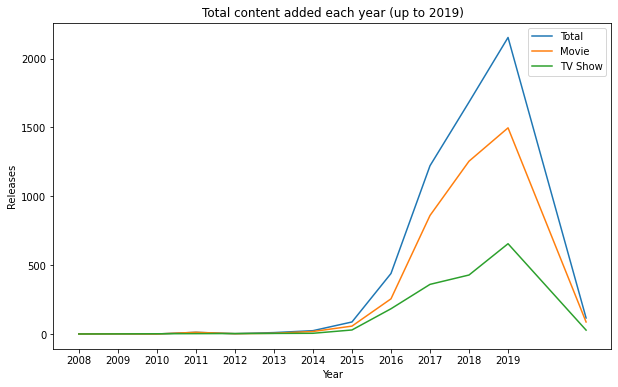

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

**Observation**: Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.



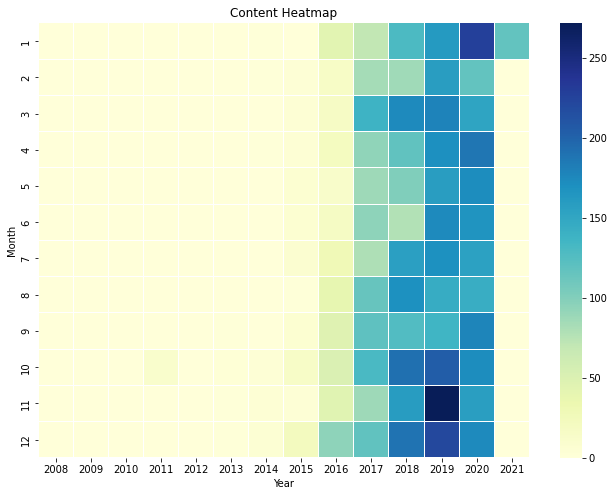

In [53]:
month_year_df = nf.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

## 4.4 Movies added to Netflix each year

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

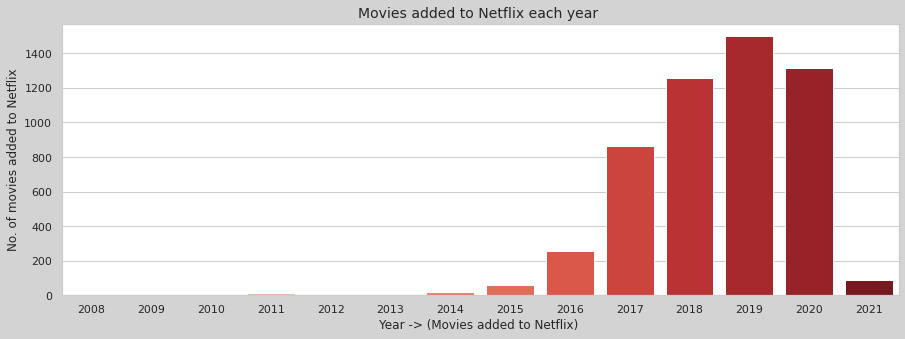

In [54]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data = nf_movies,x = 'year_added',palette ="Reds")
plt.title('Movies added to Netflix each year ', fontsize=14)
plt.ylabel('No. of movies added to Netflix', fontsize=12)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=12)

**Observation**


*   According to the above graph, **Netflix has started adding content since 2014**.

*   The popularity of OTT has boomed in the last 5 years, so we're seeing a dramatic increase in content being added.


*   There were 2000 (23%) Movies and TV shows added in the year 2019 (Highest until date).

Let's find out number of TV shows added to Netflix yearly.

## 4.5 TV shows added to Netflix yearly

Text(0.5, 0, 'Year -> (Shows added to Netflix) ')

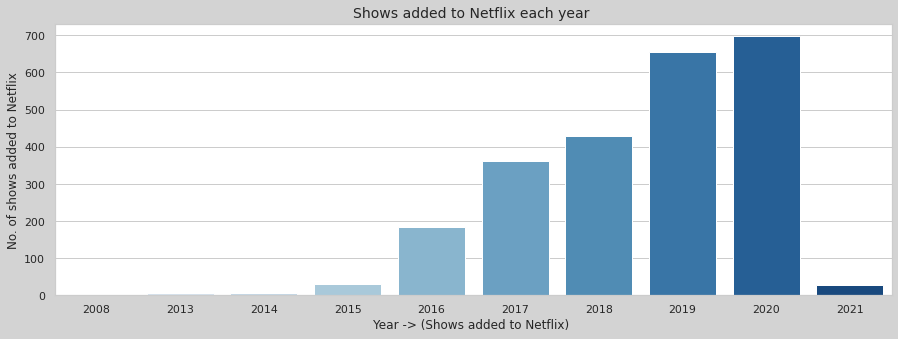

In [55]:
fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data = nf_shows,x = 'year_added',palette ="Blues")
plt.title('Shows added to Netflix each year ', fontsize=14)
plt.ylabel('No. of shows added to Netflix', fontsize=12)
plt.xlabel('Year -> (Shows added to Netflix) ', fontsize=12)

## 4.6 Count of Movies & TV shows by genres

TypeError: ignored

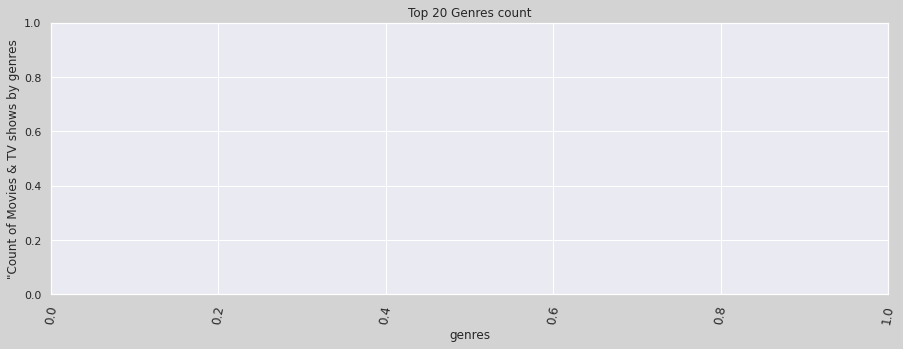

In [56]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Top 20 Genres count', fontsize=12)
plt.ylabel('"Count of Movies & TV shows by genres', fontsize=12)
plt.xlabel('genres', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
sns.barplot(x='genres',data=nf,palette="Reds_r")

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
count = nf['rating'].value_counts(normalize=True)*100
count.plot.bar(color=sns.color_palette())
plt.title('Bar plot - Rating based on the Category', fontsize=12)
plt.ylabel('"Frequency of rating category added in %', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation = 30,fontsize=12)

Inference


*   On Netflix, 48% of the content (both Movies and TV shows) is for adults.
*   According to the graph above, more than 80% of "TV & Shows" content is not suitable for kids.
*   More kid-friendly content could increase subscriber numbers.

Let's have a look at content availablility in each country

In [ ]:
filtered_countries = nf.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(12,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

##<B>4.7 Movies and TV Shows Duration (Minutes and Seasons)

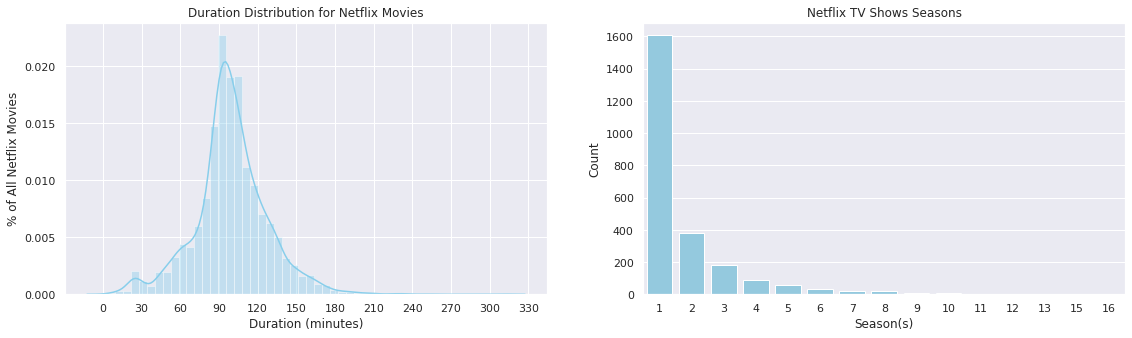

In [57]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(nf_movies.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(nf_shows.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season. 